In [1]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

In [65]:
dt = 5e-8
N = 20000
Imax = 1#[A]
Rbat = 0.2#[ohm]
Lres = 1e-6#[H]
q = 1.602*10e-19#[C]
Li = 6.941
Avogadro = 6.022e23
Li = Li/Avogadro
u0 = 1.256e-6
wmax = 20e-3

In [66]:
class IonParticle():
    def __init__(self,
                 grid = [0, 0, 0],
                 v = [0, 0, 0],
                 t = 0,
                 dt = 1e-6
                 ):
        self.grid = grid
        self.grid_all = {"x":[self.grid[0]], "y":[self.grid[1]], "z":[self.grid[2]]}
        self.v = v
        self.t = t
        self.t_all = [self.t]
        self.dt = dt
        self.N = 0
        self.Li = Li
        self.q = q
        self.axis = {"x":0, "y":1, "z":2}

    def update(self, nextv):
        self.nextv = nextv
        self.update_grid()
        self.update_v()
        self.t = self.t + self.dt
        self.N += 1
        self.grid_all["x"].append(self.grid[0])
        self.grid_all["y"].append(self.grid[1])
        self.grid_all["z"].append(self.grid[2])
        self.t_all.append(self.t)

    def update_grid(self):
        for i in range(3):
            self.grid[i] = self.grid[i] + self.nextv[i] * self.dt
        
    def update_v(self):
        for i in range(3):
            self.v[i] = self.nextv[i]

    def show_t_grid_graph(self, axis):
        plt.plot(self.t_all, np.array(self.grid_all[axis])*1e6)
        plt.xlabel("time [sec]")
        plt.ylabel(axis + "[um]")
        plt.show()

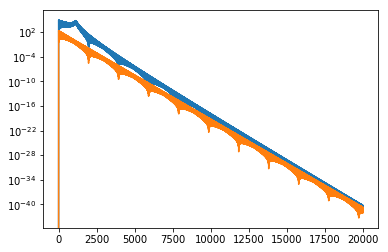

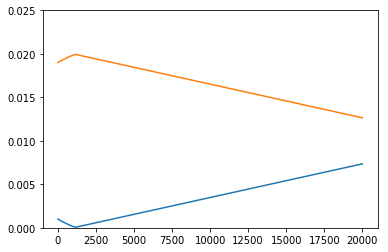

In [67]:
particle = {}
test0 = []
test1 = []
test2 = []
test3 = []
for k in range(1,20,18):
    particle[k] = IonParticle(grid = [k/1e3, 0, 0],
                              v = [0, 0, -1e4],
                              t = 0,
                              dt = dt)
    r = k/1e3
    for i in range(N):
        x = np.array([0, 1, 0])
        t = particle[k].t
        v = particle[k].v
        Ienv = Imax*np.exp(-Rbat*t/(2*Lres))*x
        Ienvb = -1*Ienv
        sin = np.sin(1e6*2*3.14*t)
        H = Ienv*sin/(4*3.14*r*r)
        rb = abs(wmax - r)
        Hb = Ienvb*sin/(4*3.14*rb*rb)
        B = u0*(H+Hb)
        test0.append(abs(H[1]))
        test1.append(abs(Hb[1]))
        test3.append(rb)
        test2.append(r)
        F = q*np.cross(B, v)
        a = F/Li
        nextv = v + a*dt
        if particle[k].grid[0] != 0:
            r = abs(particle[k].grid[0])
        particle[k].update(nextv = nextv)
    if k == 1:
        plt.plot(list(range(N)),test0)
        plt.plot(list(range(N)),test1)
        plt.yscale("log")
        plt.show()
        plt.plot(list(range(N)),test2)
        plt.plot(list(range(N)),test3)
        plt.ylim(-0.00,0.025)

dict_keys([1, 19])


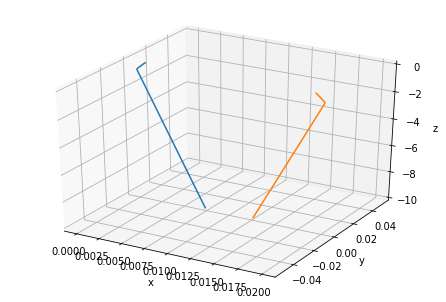

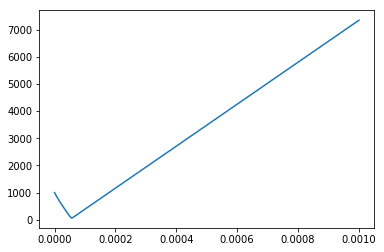

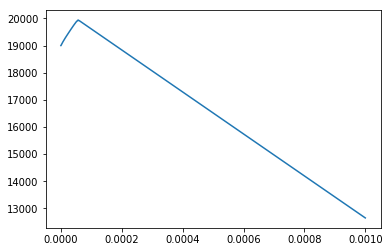

0.001 0.007349463901568039


In [68]:
fig = plt.figure()
ax = p3.Axes3D(fig)
print(particle.keys())
for k in range(1,20,18):
    #
    ax.plot(particle[k].grid_all["x"], particle[k].grid_all["y"], particle[k].grid_all["z"])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

plt.plot(particle[1].t_all, np.array(particle[1].grid_all["x"])*1e6)
plt.show()
plt.plot(particle[19].t_all, np.array(particle[19].grid_all["x"])*1e6)
plt.show()
print(particle[1].grid_all["x"][0], particle[1].grid_all["x"][-1])